# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [71]:
#Load packages and read data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


data = pd.read_csv(
    "peer_effects_room.csv",
)

data.head(5)

,person,room,high_school_GPA,college_GPA
0,0,351,-1.715472,-1.285307
1,1,738,-0.530190,-0.031833
2,2,247,-0.589543,-0.203230
3,3,751,-1.303115,0.982488
4,4,698,0.156678,-0.371632


In [72]:
df = data.merge(data[['person', 'room']], on = 'room', suffixes = ('', '_other'))
df = df[df['person'] != df['person_other']]

df.head(5)

,person,room,high_school_GPA,college_GPA,person_other
1,0,351,-1.715472,-1.285307,1645
2,1645,351,-0.818594,-0.434847,0
5,1,738,-0.530190,-0.031833,1039
6,1039,738,-0.493444,0.299729,1
9,2,247,-0.589543,-0.203230,944


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [73]:
data2=data[['high_school_GPA','college_GPA', 'person']]

df = df.merge(data2, left_on = 'person_other', right_on='person', suffixes = ('', '_other'))
df=df.iloc[:, :-1]

df.head(5) # Check merge
df

,person,room,high_school_GPA,college_GPA,person_other,high_school_GPA_other,college_GPA_other
0,0,351,-1.715472,-1.285307,1645,-0.818594,-0.434847
1,1645,351,-0.818594,-0.434847,0,-1.715472,-1.285307
2,1,738,-0.530190,-0.031833,1039,-0.493444,0.299729
3,1039,738,-0.493444,0.299729,1,-0.530190,-0.031833
4,2,247,-0.589543,-0.203230,944,1.281112,-0.479543
...,...,...,...,...,...,...,...
1995,1951,54,2.111587,-0.610765,1860,1.993014,1.870441
1996,1884,178,-1.261528,-2.280256,1916,-1.706630,-3.209575
1997,1916,178,-1.706630,-3.209575,1884,-1.261528,-2.280256
1998,1922,730,1.642223,4.076931,1946,-0.121075,0.114143


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

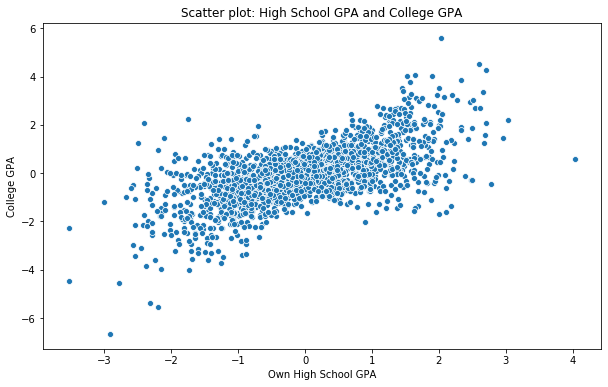

In [87]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="high_school_GPA", y="college_GPA", data=df)
ax.set(xlabel='Own High School GPA', ylabel=""'College GPA'"", title="Scatter plot: High School GPA and College GPA")
plt.show()

Unsurprisingly, at a first glance there seems to be a positive correlation between HS and college GPA

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

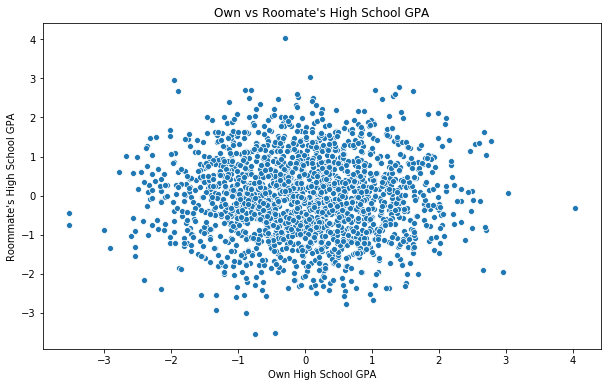

In [89]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="high_school_GPA", y="high_school_GPA_other", data=df)
ax.set(xlabel='Own High School GPA', ylabel="Roommate's High School GPA", title="Own vs Roomate's High School GPA")
plt.show()

There doesn't seem to be any apparent pattern of correlation, i.e. it looks like we have random assignment

In [85]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('high_school_GPA ~ high_school_GPA_other', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        high_school_GPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Fri, 22 May 2020   Prob (F-statistic):              0.788
Time:                        14:18:29   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.02

From the output we see that the estimated effect of roommates HS GPA on one's own GPA is highly insignificant, implying that the two are not correlated.

This is good for us as it means that we do not need to worry about a potential selcetion problem when we want to estimate peer effects later on

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

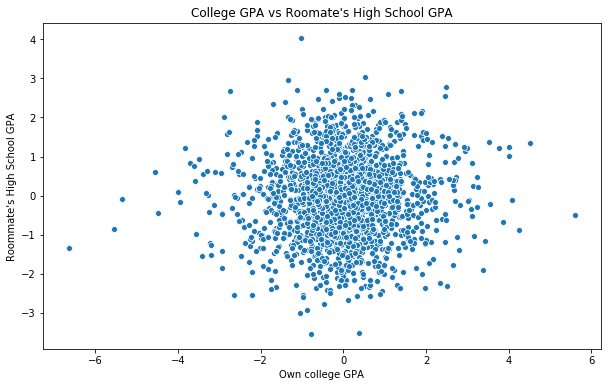

In [90]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="college_GPA", y="high_school_GPA_other", data=df)
ax.set(xlabel='Own college GPA', ylabel="Roommate's High School GPA", title="College GPA vs Roomate's High School GPA")
plt.show()

By simple eyeball econometrics it does not seem like we have any correlation between the two measures. For a formal test, I again run a regression...

In [91]:
results2 = smf.ols('college_GPA ~ high_school_GPA_other', data=df).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:            college_GPA   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.584
Date:                Fri, 22 May 2020   Prob (F-statistic):              0.208
Time:                        14:26:51   Log-Likelihood:                -3099.5
No. Observations:                2000   AIC:                             6203.
Df Residuals:                    1998   BIC:                             6214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.04

The regression confirms the suspcicion that one's own college_GPA is uncorrelated to roommate's HS GPA, as the latter is insignificant (p=0.208)

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

In [96]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

results3 = smf.ols('college_GPA ~ college_GPA_other', data=df).fit()
printmd("**Simple OLS**")
print(results3.summary())

results4 = smf.ols('college_GPA ~ high_school_GPA+college_GPA_other', data=df).fit()
printmd("**Controlling for own High School GPA**")
print(results4.summary())

**Simple OLS**

                            OLS Regression Results                            
Dep. Variable:            college_GPA   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     13.91
Date:                Fri, 22 May 2020   Prob (F-statistic):           0.000197
Time:                        14:35:50   Log-Likelihood:                -3093.3
No. Observations:                2000   AIC:                             6191.
Df Residuals:                    1998   BIC:                             6202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0400      0.02

**Controlling for own High School GPA**

                            OLS Regression Results                            
Dep. Variable:            college_GPA   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     680.4
Date:                Fri, 22 May 2020   Prob (F-statistic):          4.46e-226
Time:                        14:35:50   Log-Likelihood:                -2580.6
No. Observations:                2000   AIC:                             5167.
Df Residuals:                    1997   BIC:                             5184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0209      0.02

The two outputs above suggest that there might seem to be an association between the college GPA of oneself and one's roommates, but that this disappears when we control for one's own prior academic achievements (HS GPA)

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

The researchers exploit the year-by-year variation in student composition (at the school level) to identify peer effects. 

This is done by adding school fixed effects and year fixed effects. The intuition is that there might be selection into a certain school based on its general reputation, which is addressed by adding the school fixed effects, but the likelihood that there is a knowledge of the yearly fluctuations in peer composition at the school is less likely. Consequently, the researchers arue that since this source of variation can not be be accurately foresoon by the parents, then there will not be any selection bias when relying on this variation. 

Finally, in order to take into account that there might be year effects they include a year dummy.

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

As the authors themselves note, the strategy requires that there is no selection based on whether it is a "good" or "bad" year at the school in order to consistently estimate the peer effects. This assumption will fail if e.g. ressourceful parents choose o move their children to another (privat) school if there is a "bad" year.

Moreover, as the model implies a linear-in-means understanding of peer effects it is subject to the model's constraint that the net effect of reassignment is zero. Apart from being disheartening from a societal point of view the model may also fail to uncover the substantial heterogeneity in peer effects on student outcomes found in many other studies.

Hoxby(2000) performs a range of specification tests to test the validity f her results, including one to check whether the year-to-year variation is in fact, as desired, likely due solely idiosyncratic factors. 

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.

In order to overcome the (many!) identification issues when trying to estimate peer effects, I would ideally investigate the question using an experiment.

To avoid the issues pointed out by Angrist(2014) concerning natural variation I would suggest a setup like the one described in Booij et al. (2017), where they design an assignment procedure (to classes) that ensured substantially higher variation in class composition - in terms of "prior ability level (high school grades)" - than what would have naturally occured.

Though this strategy only allows for identification of reduced form estimates it is arguably still informative of peer effects.

However, a major concern of the proposed setup are the ethical and practical aspects: Would parents and politicians allow for such assignement to schools and how much will geography constraint such efforts? 